In [ ]:
from arcgis.features import FeatureLayer
import geopandas as gpd
from shapely.geometry import shape

# Step 1: Connect to the Feature Layer
url = "https://services1.arcgis.com/taguadKoI1XFwivx/arcgis/rest/services/WCV_Centers_and_Regional_Land_Uses/FeatureServer/0"
layer = FeatureLayer(url)

# Step 2: Query all features
features = layer.query(where="1=1", out_sr=4326)
sdf = features.sdf  # Spatially enabled DataFrame

# Step 3: Convert geometry (SHAPE) to Shapely and build GeoDataFrame
gdf = gpd.GeoDataFrame(sdf.drop(columns=['SHAPE']),
                       geometry=sdf['SHAPE'].apply(lambda x: shape(x.__geo_interface__)),
                       crs="EPSG:4326")


# Export to Shapefile
gdf.to_file("data/Wasatch_Choice_Centers_June_2025/WCV_Centers_and_Regional_Land_Uses.shp", driver="ESRI Shapefile")

print("✅ Shapefile saved successfully.")


✅ Shapefile saved successfully.


<positron-console-cell-1>:20: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
C:\Users\Pukar.Bhandari\AppData\Local\miniconda3\envs\wfrc\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'IndicatorLU' to 'IndicatorL'
  ogr_write(
C:\Users\Pukar.Bhandari\AppData\Local\miniconda3\envs\wfrc\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'DwellingPerAcre' to 'DwellingPe'
  ogr_write(
C:\Users\Pukar.Bhandari\AppData\Local\miniconda3\envs\wfrc\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'CatchmentPop' to 'CatchmentP'
  ogr_write(
C:\Users\Pukar.Bhandari\AppData\Local\miniconda3\envs\wfrc\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Shape__Area' to 'Shape__Are'
  ogr_write(
C:\Users\Pukar.Bhandari\AppData\Local\miniconda3\envs\wfrc\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarni

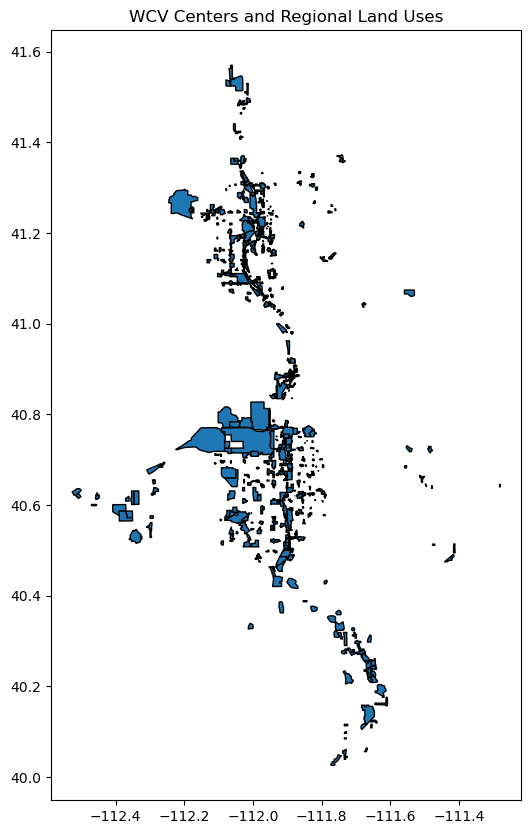

In [2]:
import matplotlib.pyplot as plt

# Plot using GeoPandas
gdf.plot(figsize=(10, 10), edgecolor='black', column=None)  # Or column="category" to color by attribute
plt.title("WCV Centers and Regional Land Uses")
plt.show()


In [3]:
gdf

,OBJECTID,CenterName,CenterType,MPO,City,IndicatorLU,Walkable,Stories,Transit,MinRoadway,DwellingPerAcre,NonResFAR,CatchmentPop,ImageURL,Shape__Area,Shape__Length,geometry
0,1,Adobe Rock Products,Industrial District,WFRC,"Erda, Tooele County","Manufacturing, logistics, or other goods movement",N/A,Varies,Transit service for workforce access,"Access to freeway, rail, or truck routes",N/A,0.35-1.5,N/A,,2233130.019852,7280.158581,"POLYGON ((-112.29142 40.62925, -112.29108 40.6..."
1,2,Airport Employment Area,Employment District,WFRC,Erda,Regionally significant employment-focused uses...,Varies,Varies,Transit-supportive infrastructure and service,Near freeways or arterials,N/A,0.5-2.5,N/A,,6985132.851562,11891.920215,"POLYGON ((-112.34717 40.63106, -112.33291 40.6..."
2,3,Devil's Slide Cement Plant,Industrial District,WFRC,Weber County,"Manufacturing, logistics, or other goods movement",N/A,Varies,Transit service for workforce access,"Access to freeway, rail, or truck routes",N/A,0.35-1.5,N/A,,5285940.929688,9798.949521,"POLYGON ((-111.53964 41.06036, -111.53977 41.0..."
3,4,Eden City Center,City Center,WFRC,Weber County,Grocery store/restaurant + neighborhood center...,Yes,2-5,Intersection of frequent bus lines --or-- serv...,Intersection of major collector with an arterial,10-50,0.5-1.5,"25,000",https://wfrc.org/app_images/Centers/CityCenter...,1135005.789062,4850.624455,"POLYGON ((-111.82054 41.30893, -111.82056 41.3..."
4,5,Grantsville Main Street,Neighborhood Center,WFRC,Grantsville,"Retail (pharmacy, restaurant) and/or civic (el...",Yes,1-3,Frequent bus service (or better),Intersection of collectors / along a major col...,6-25,0.35-1.0,"2,500",https://wfrc.org/app_images/Centers/Neighborho...,551762.070312,4181.8934,"POLYGON ((-112.47082 40.60012, -112.47082 40.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,514,West Jordan Industrial Center,Neighborhood Center,WFRC,West Jordan,"Retail (pharmacy, restaurant) and/or civic (el...",Yes,1-3,Frequent bus service (or better),Intersection of collectors / along a major col...,6-25,0.35-1.0,"2,500",https://wfrc.org/app_images/Centers/Neighborho...,2122035.261719,6529.322949,"POLYGON ((-112.06634 40.58806, -112.06631 40.5..."
513,515,<NA>,Retail District,WFRC,Farr West,Regional-serving shopping center or corridor,Some walkable elements (esp. internal),1-3,Served by bus or BRT,At major arterial intersection,6-25,0.35-1.5,"50,000",,334199.085938,3006.322692,"POLYGON ((-112.03125 41.32885, -112.03367 41.3..."
514,516,<NA>,Industrial District,WFRC,Farr West,"Manufacturing, logistics, or other goods movement",N/A,Varies,Transit service for workforce access,"Access to freeway, rail, or truck routes",N/A,0.35-1.5,N/A,,775426.261719,5674.535157,"POLYGON ((-112.03125 41.32885, -112.03074 41.3..."
515,517,<NA>,Retail District,WFRC,Farr West,Regional-serving shopping center or corridor,Some walkable elements (esp. internal),1-3,Served by bus or BRT,At major arterial intersection,6-25,0.35-1.5,"50,000",,421215.746094,3910.085434,"POLYGON ((-112.02947 41.2736, -112.02934 41.27..."
